**By Peter A. Stokes, École Pratique des Hautes Études – Université PSL**


_These are brief notes summarising the key points of image analysis and manipulation using Python. They are intended as teaching aids for the course on 'Image Processing with Python' which is part of the École d'été d'éditions numériques / humanités numériques (EDEEN). For more details see https://edeen.sciencesconf.org. They assume a pre-existing directory structure with images of Cambridge, Corpus Christi College MS 44 which can be obtained from Parker on the Web: https://parker.stanford.edu_.

_If you are viewing this in Jupyter then you can edit the code simply by typing in the boxes. You can also execute the code in any box by clicking on the box and typing SHIFT + ENTER or using the 'Run' button in the menubar above._


# Python basics

This section gives a very brief summary of the basics of the Python 3 programming language. If you already know Python 3 then you can skip this section. If you know an earlier version of Python such as Python 2.7, then you can also skip this section, but be aware that `print 'hello'` is no longer valid: in Python 3 you must always include the parentheses, so `print('hello')` instead.

## Variables

To create a new variable for storing data in memory, simply provide a unique name for that variable and use `=` to assign the content. Note that you can re-assign different content to an existing variable, in which case the new content will simply replace the old (hence the name 'variable'). You can have as many different variables as you like, as long as your computer doesn't run out of RAM. This is unlikely with modern computers, but it is possible if you have very large images.

Notice also the `#` symbol. This is to signal a 'comment': i.e. everything after `#` on that line is a comment for us humans to read and so will be ignored by Python. It is very good practice to add comments as a reminder to you and a message to others of what your code does. You will be grateful when you come back to your code in a year's time!

In [ ]:
a = 1      # Stores the integer (whole number) value 1 in the variable a
b = 2.0    # Stores the decimal value 2.0 in the variable b

c = a + b  # Stores the decimal value 3.0 (1 + 2.0) in the variable c
c = c + 1  # Stores the decimal value 4.0 (3.0 + 1) in the variable c

d = c / b  # Stores the decimal value of c divided by b into the variable d
e = b * c  # Stores the decimal value of b multiplied by c into the variable f

print(c)   # Prints the value currently stored in c (i.e. 4)
print(d)
print(e)


Variables do not have to contain numbers but they can contain many things, including images (as we will see soon). Another common type of data is a string, namely a series of characters:

In [ ]:
s1 = 'This is a string. It must be enclosed in single quotes.'
s2 = 'The single quotes tell Python that it is a string.'
s3 = 'Otherwise, Python might think that it is the name of a variable.'

print(s1)
print(s2)
print(s3)

print('You can also print a string directly without storing it first.')
print(s1, s2, s3) # Notice what happens here

## Libraries

If you want to use a library of existing code then you **must** first tell Python to load it into your system **before** you use the library code. You can import an entire library, but normally you only import specific parts from that library. For this you use the `import` or `from ... import` command. You can also add `as` to give the library a short name if you want, as we do in the example below: `matplotlib.pyplot` is a pain to type so we give it the name `plt` for short. These are the libraries that we will be using today:

In [ ]:
from PIL import Image
from PIL import ImageOps
from PIL import ImageChops
import matplotlib.pyplot as plt

## Lists

Lists are a more complex type of data, but one that is very useful as it allows us to store a list of things in a single variable. To do this we use square brackets, with the contents of the list in the brackets separated by commas. We can have lists of anything we want: integers, decimal numbers, strings, images, ...

In [ ]:
list1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
list2 = [1.0, 2.6, 3.3, 4.7, 5.1, 6.7]
list3 = ['a', 'b', 'c', 'd', 'e']
list4 = ['bonjour', 'au revoir', 'ça va ?', 'très bien']

print(list1)
print(list2)
print(list3)
print(list4)

At times we may want to access specific items in the list. To do this we use the following system:

In [ ]:
list1[0]      # Gives us the first item in the list.
list2[-1]     # Gives us the last item in the list
list3[0:3]    # Gives us the first three items in the list
list3[:3]     # Also gives us the first three items in the list
list4[-3:]    # Gives us the last three items in the list
list1[2:5]    # Gives us the third (!) through fifth items in the list

# Let's test it:
print(list1[0])      # Gives us the first item in the list.
print(list2[-1])     # Gives us the last item in the list
print(list3[0:3])    # Gives us the first three items in the list
print(list3[:3])     # Also gives us the first three items in the list
print(list4[-2:])    # Gives us the last two items in the list
print(list1[2:5])    # Gives us the third (!) through fifth items in the list



# The Python Imaging Library (PIL)

The PIL gives us a lot of basic features for manipulating images. Here are some of the key ones. Remember that you must have already run the appropriate `import PIL` statement(s) before you use the commands. 

## Opening and saving image files; showing images

To load and save images we need to tell Python where the image can be found. This can be a bit complicated as it depends on where you are running your code. It can also depend on whether or not you're using Windows, as Microsoft long ago decided to use the opposite convention to everyone else for directories (namely `\` instead of `/`).

**Be careful when saving images as you can easily overwrite your data by mistake**. If you try to save an image and a file exists already at that path and with that file name then **Python will simply overwrite your existing file without even asking**.

In [ ]:
# Loads the image 001.jpg in the directory CCCC 44 and store it in im
im = Image.open('CCCC 44/001.jpg')

# Show the image
im.show()

# Save the image with a different name
im.save('newimage.jpg')

## Getting basic image information

This is straightforward. Here (and for the rest of this document) we assume that `im` is a variable containing an image using `Image.open()` as shown above.

In [ ]:
print('Image size:', im.size)
print('Image height:', im.height)
print('Image width:', im.width)
print('Image format', im.format)
print('Image mode:', im.mode)
print('Image info:', im.info)

## Rotation and reflection

**Note that each of these operations creates a new image**. We store the result in a new variable. This is (usually) what we want as that means we keep the original image; otherwise we could store the result in the original variable, overwriting the original image.

In [ ]:
# Flip - i.e. mirror vertically
image_flipped = ImageOps.flip(im)
image_flipped.show('Flipped image')

# Mirror - i.e. mirror horizontally
image_mirror = ImageOps.mirror(im)
image_mirror.show('Mirrored image')

# Rotate. NB that rotation is anticlockwise
image_rotate1 = im.rotate(45)
image_rotate2 = im.rotate(-45)
image_rotate_nocrop = im.rotate(135, expand=True)

image_rotate1.show()
image_rotate2.show()
image_rotate_nocrop.show()

## Resizing Images

This works much the same way, except that we have to specify the size of the new image. Note that this can cause very distorted images, unless we do the calculations to preserve the image ratio.

In [ ]:
size = 400, 200

image_resized = im.resize(size)

image_resized.show()

# Let's do this properly, calculating the image ratio
new_height = 400

new_width = int((400 / im.height) * im.width)

size2 = (new_width, new_height)
image_resized2 = im.resize(size2)
image_resized2.show()

### Creating thumbnails

As well as `resize()` above, PIL provides a special way for creating thumbnails. If we want to create thumbnail images we first need to specify the size of the thumbnail. This is the maximum size in each dimension. In other words, the longest side of the image will be set to this maximum value, and the shorter side of the image will be scaled to whatever size is appropriate to keep the proportions right.

**Note that the thumbnail operation does not create a new image but overwrites the old image**. For this reason we may well want to creat a copy of the original image so we can use it again later.

In [ ]:
size = 128, 128               # Set size to 128 pixels in both directions
im_thumbnail = im.copy()      # Create a copy of the image
im_thumbnail.thumbnail(size)  # Turn the image into a thumbnail

im_thumbnail.show()
im.show()

## Basic image enhancement

The PIL gives us some basic functions for image enhancement. These include the examples given below. Note that this time we are not creating a new variable for each image but we are re-using one variable.

In [ ]:
# Automatically enhance the contrast
im_enhanced = ImageOps.autocontrast(im)
im_enhanced.show()

# Automatically adjust the histogram
im_enhanced = ImageOps.equalize(im)
im_enhanced.show()

## Automatic batch processing of a set of images

The easiest way to create an automatic batch process of a set of images is to use a `for` loop. For instance, if we have a set of images and we want to turn them all into thumbnails, we need to do the following:

1. Create a list of image file names
1. For each entry in the list:
   1. Take the next file name from the list and store it in a variable
   1. Load the image
   1. Convert the image into a thumbnail
   1. Save the image

In [ ]:
# Create our list of image files
im_list = ['001.jpg', '011.jpg', '016.jpg', '021.jpg']

# Set our thumbnail size
size = 128, 128

# For each file in the list...
for f in im_list:
    im = Image.open('CCCC 44/' + f)
    im.thumbnail(size)
    im.save('CCCC 44/thumb_' + f)

It's also possible to ask Python to read the contents of the directory automatically for us. We have to be a bit careful here because there may be different files in the directory, and if we try to read a text file (or Word document or whatever) and treat it as an image then we will get an error and our script will crash. To avoid this, we can try making assumptions such as reading only those files ending in `.jpg`. To do this we use the (rather oddly named) `glob` function to create the list.

There is a further complication, though. The `glob` function gives us the file path, so the items in the list that `glob` gives us are `CCCC 44/001.jpg` and so on. This is what we want when we are opening the file. However, it makes things complicated when we want to _save_ the file, because if we save to `CCCC 44/001.jpg` then we will overwrite all our nice high-resolution files! Instead it's better to create a new directory, say `CCCC 44/thumb`, and save there. This means we need to do the following:

1. Check if the `CCCC 44/thumb` directory already exists
   1. If it doesn't exist then create it
1. For each file in the `CCCC 44` directory:
   1. Open the file and store it in RAM
   1. Create the thumbnail
   1. Get just the filename from the path, without the directory (so we have, for instance, '001.jpg' instead of 'CCCC 44/001.jpg')
   1. Add 'CCCC 44/thumb/' back to the filename (so we have, for instance, CCCC 44 thumb/001.jpg')
   1. Save the thumbnail to the new location
   
Fortunately there is a library called `os` that can help us a lot here.

In [ ]:
import glob
import os

# Set our thumbnail size
size = 128, 128

# Save our directory names here. This is so we don't have to keep
# typing it out, and so that if we want to change it then we only
# have to do so once.

directory = 'CCCC 44/'
outdirectory = directory + 'thumb/'

# Check if the output directory exists and create it if it doesn't
if not os.path.exists(outdirectory):
    os.makedirs(outdirectory)
    
# Get a list of all files matching *.jpg in the directory
im_list = glob.glob(directory + '*.jpg')

# For each file in the list...
for f in im_list:
    im = Image.open(f)
    im.thumbnail(size)
    im.save(outdirectory + os.path.basename(f))

See how fast that was! Of course we don't have to create thumbnails: we can change the code to do any operation or sequence of operations that we want.

## Image Histograms

The PIL Image library also includes a function to generate the histogram. It returns a list of numbers, one number for each 'bin' in the histogram. If we want then we can create a plot of the histogram using a new library:

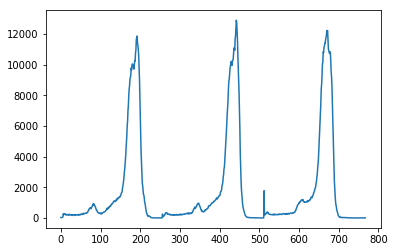

In [20]:
import matplotlib.pyplot as plt

im = Image.open('CCCC 44/001.jpg')

hist = im.histogram()
plt.plot(hist)
plt.show()

This looks odd because PIL concatenates all the colour channels into one. To generate a 'normal' histogram for an RGB image, we have to slice the list into thirds, one for each colour channel:

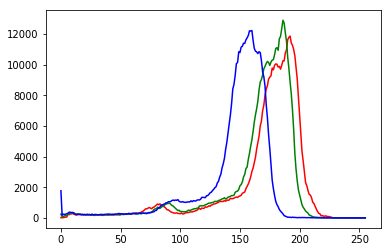

In [21]:
im = Image.open('CCCC 44/001.jpg')

hist = im.histogram()

length = len(hist) // 3   ## // is division but returning an integer (whole) number
   
plt.plot(hist[:length], 'r')
plt.plot(hist[length:-length], 'g')
plt.plot(hist[-length:], 'b')
plt.show()
